<a href="https://colab.research.google.com/github/sjdoescoding/CE889/blob/main/CE889_Individual_Assignment_(might_be_working).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting Google Drive
# from zipfile import ZipFile
  
from google.colab import drive #mounting to drive
drive.mount('/content/drive', force_remount=True)


df = pd.read_csv('/content/drive/MyDrive/CE8889/ce889_dataCollection.csv')

Mounted at /content/drive


In [2]:
df.head()

,X,Y,Z,O
0,222.139837,431.9,0.2,0.00
1,222.139837,431.7,0.3,0.04
2,222.099838,431.4,0.4,0.00
3,222.099838,431.0,0.5,0.04
4,222.059837,430.5,0.6,0.00


In [3]:
df.columns

Index(['X', 'Y', 'Z', 'O '], dtype='object')

In [4]:
df.rename(columns = {'X':'X_dist', 'Y':'Y_dist','Z':'X_vel','O ': 'Y_vel'}, inplace = True)

In [5]:
df.shape

(16355, 4)

In [6]:
train = df.iloc[:,0:2]

test = df.iloc[:,-2:]

print(train, test)

           X_dist      Y_dist
0      222.139837  431.900000
1      222.139837  431.700000
2      222.099838  431.400000
3      222.099838  431.000000
4      222.059837  430.500000
...           ...         ...
16350   19.532575   71.281907
16351   19.511409   69.656793
16352   19.516293   68.131191
16353   19.467225   66.705103
16354   19.444205   65.378527

[16355 rows x 2 columns]           X_vel     Y_vel
0      0.200000  0.000000
1      0.300000  0.040000
2      0.400000  0.000000
3      0.500000  0.040000
4      0.600000  0.000000
...         ...       ...
16350  1.625114  0.021165
16351  1.525601 -0.004883
16352  1.426089  0.049068
16353  1.326576  0.023019
16354  1.227063 -0.003029

[16355 rows x 2 columns]


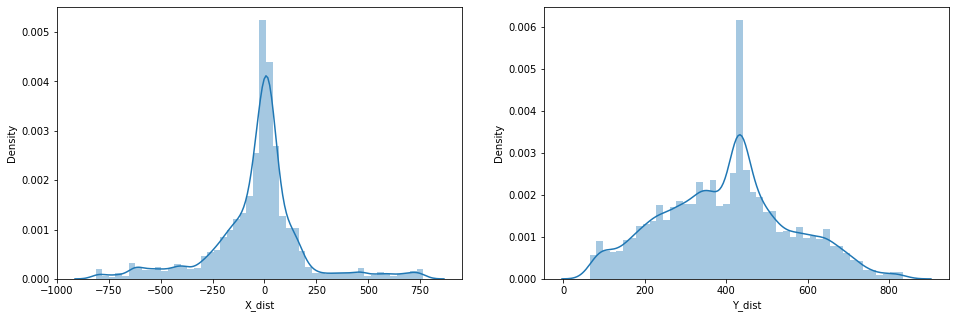

In [7]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['X_dist'])
plt.subplot(1,2,2)
sns.distplot(df['Y_dist'])
plt.show()

In [8]:
from sklearn import preprocessing


#Scaling and normalising train set
x = train.values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = x_scaled

# #Scaling and normalising test output 
y = test.values.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
y = x_scaled

In [20]:
X.shape

(32710, 1)

In [17]:
y.shape

(32710, 1)

In [22]:
# Converting matrices into arrays 
X = np.squeeze(np.asarray(X))
y = np.squeeze(np.asarray(y))

In [24]:
X

array([0.62841298, 0.75571918, 0.62841298, ..., 0.5340776 , 0.50539434,
       0.53327248])

In [25]:
y

array([0.62841298, 0.75571918, 0.62841298, ..., 0.5340776 , 0.50539434,
       0.53327248])

In [13]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 0)

# Neural Network


In [26]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def training(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

In [28]:
input_vector = X

targets = y

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.training(input_vector, targets, 10000)

# neural_network.predict(input_vector)

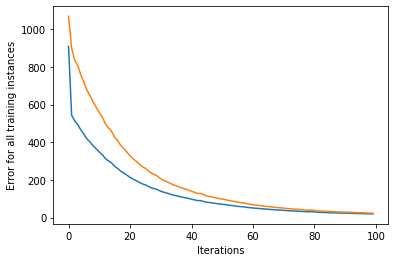

In [29]:
# import matplotlib.pyplot as plt

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")